<a href="https://colab.research.google.com/github/Nelson-Paul-Christy/AirBNB-Analysis-using-Powerbi/blob/main/Data_Visualization_Telecom_customer_churn_case_study_with_Rajan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Telecom Customer Churn Case Study
---

Dataset link:

https://drive.google.com/file/d/1hYhBU-BHw85woP_sZD5CfVB62BmLUhNo/view?usp=sharing

In [ ]:
# import the required libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',100)

In [ ]:
df = pd.read_csv('telco_churn.csv')

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.TotalCharges.head(3)

,TotalCharges
0,29.85
1,1889.5
2,108.15


In [ ]:
df['TotalCharges'] = df['TotalCharges'].astype('float')

ValueError: could not convert string to float: ' '

In [ ]:
df['TotalCharges'].value_counts()

,count
TotalCharges,
,11
20.2,11
19.75,9
20.05,8
19.9,8
...,...
130.15,1
3211.9,1
7843.55,1


In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [ ]:
df.TotalCharges.dtype

dtype('float64')

In [ ]:
# errors='coerce' , it will treat/change abnormal values as null

In [ ]:
df.TotalCharges.isna().sum()

np.int64(11)

In [ ]:
df[df.TotalCharges.isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


# Analysis ( univariate / bivariate)
---

In [ ]:
df.Churn.head()

,Churn
0,No
1,No
2,Yes
3,No
4,Yes


In [ ]:
df.Churn.unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
df_loyal = df[df.Churn == 'No']

df_migrated = df[df.Churn == 'Yes']

In [ ]:
df_loyal.Churn.head()

,Churn
0,No
1,No
3,No
6,No
7,No


In [ ]:
df_migrated.Churn.head()

,Churn
2,Yes
4,Yes
5,Yes
8,Yes
13,Yes


In [ ]:
df.MonthlyCharges.head()

,MonthlyCharges
0,29.85
1,56.95
2,53.85
3,42.30
4,70.70


## Univariate Analysis
---
target variable: monthly charges

objective: to understand the monthly spending habbits of People ( churn vs non-churn)

/tmp/ipython-input-3194334500.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( df_loyal['MonthlyCharges'], label='Loyal Customers' ,hist=False)
/tmp/ipython-input-3194334500.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( df_migrated['MonthlyCharges'], label='Migrated 

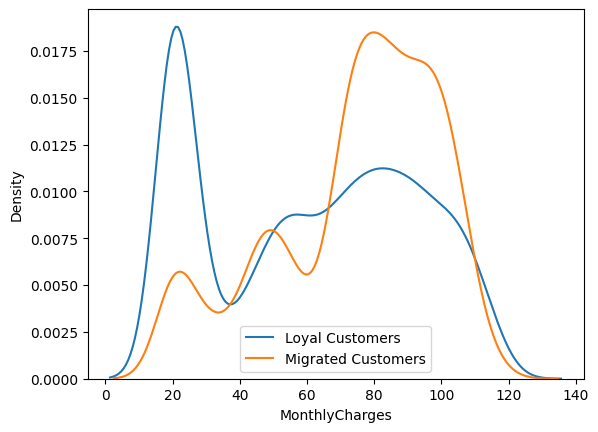

In [ ]:
sns.distplot( df_loyal['MonthlyCharges'], label='Loyal Customers' ,hist=False)
sns.distplot( df_migrated['MonthlyCharges'], label='Migrated Customers',hist=False)
plt.legend()
plt.show()

# Univariate Analysis
---
target variable : Contract Type

In [ ]:
df.Contract.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

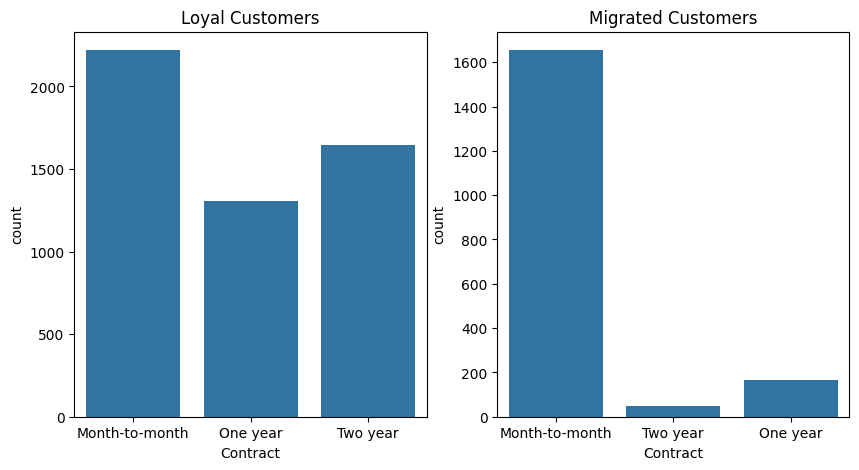

In [ ]:
# let us find the customers distribution in loyal vs migrated

plt.figure(figsize=(10,5))
plt.subplot( 1,2,1)
plt.title('Loyal Customers')
sns.countplot (x='Contract', data = df_loyal )        # this is same as histogram but without frequency  , though it returns the frequency/count distribution

plt.subplot( 1,2,2)
plt.title('Migrated Customers')
sns.countplot (x='Contract', data = df_migrated )
plt.show()

## Bivariate Analysis
---
Target Variable : Contract vs Monthly Charges ( loyal vs migrated)

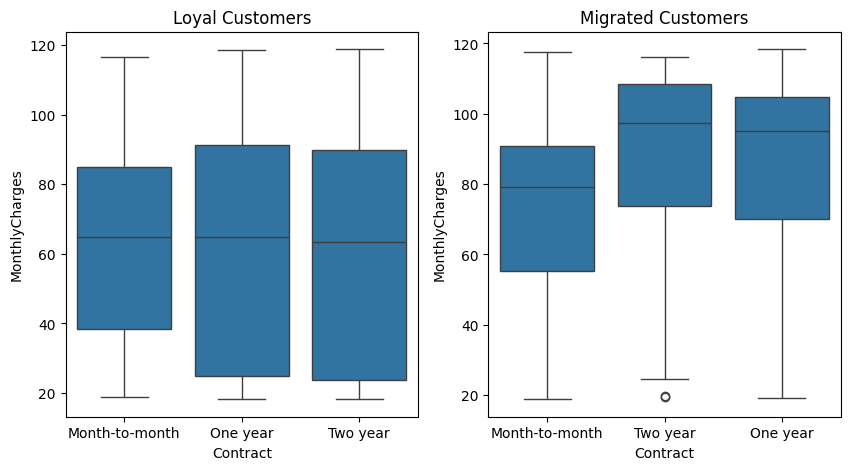

In [ ]:
# let us find the customers distribution in loyal vs migrated

plt.figure(figsize=(10,5))
plt.subplot( 1,2,1)
plt.title('Loyal Customers')
sns.boxplot(x='Contract',y='MonthlyCharges',data=df_loyal)

plt.subplot( 1,2,2)
plt.title('Migrated Customers')
sns.boxplot(x='Contract',y='MonthlyCharges',data= df_migrated )
plt.show()

In [ ]:
# it is not the monthly charge factor which is driving the migration in month to month contract.

In [ ]:
# loyal customer: 25% of customers are paying      <=40 rs a month
# migrated customers: 25% of customers are paying  <=55 rs a month


# 40 vs 55   : 15 rs may be the reason for migration or may be not considering other factors like (weak network)

# Gender Wise Customer distribution based on  Contaract



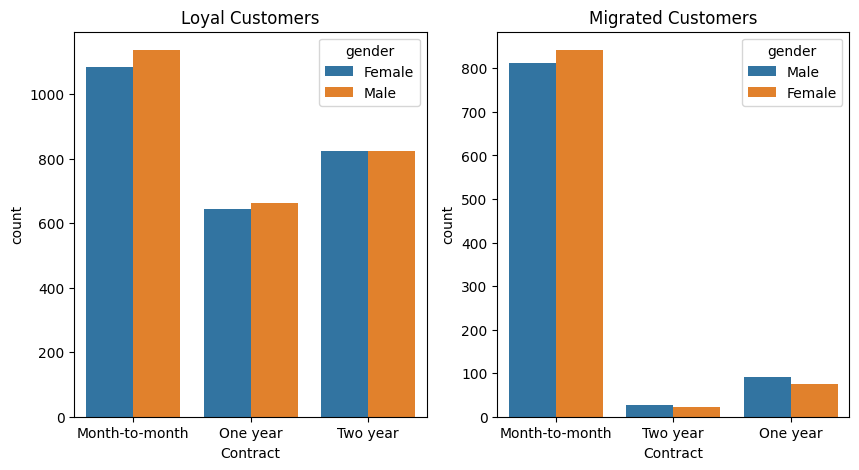

In [ ]:
# let us find the customers distribution in loyal vs migrated

plt.figure(figsize=(10,5))
plt.subplot( 1,2,1)
plt.title('Loyal Customers')
sns.countplot(x='Contract', hue='gender', data = df_loyal )        # this is same as histogram but without frequency  , though it returns the frequency/count distribution

plt.subplot( 1,2,2)
plt.title('Migrated Customers')
sns.countplot (x='Contract', hue='gender', data = df_migrated )
plt.show()

# Objective: you wish to see the Monthly Charges Distribution in 5 Splits
---

please suggest the plot type

In [ ]:
pd.cut(  df['MonthlyCharges'],bins=5).value_counts()

,count
MonthlyCharges,
"(78.55, 98.65]",1826
"(18.15, 38.35]",1797
"(58.45, 78.55]",1367
"(98.65, 118.75]",1048
"(38.35, 58.45]",1005


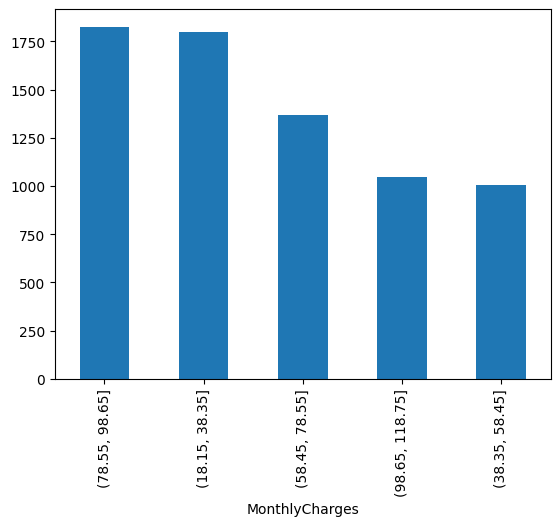

In [ ]:
pd.cut(  df['MonthlyCharges'],bins=5).value_counts().plot(kind='bar');